# Dataset Visualization

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.io import loadmat

from sklearn import svm

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [29]:
# Load in the data as a dictionary
Kol=loadmat('Kol_Label.mat')
# Separate keys of the dictionary
KE = Kol['KE']
w_raw = Kol['w']
state = Kol['state']

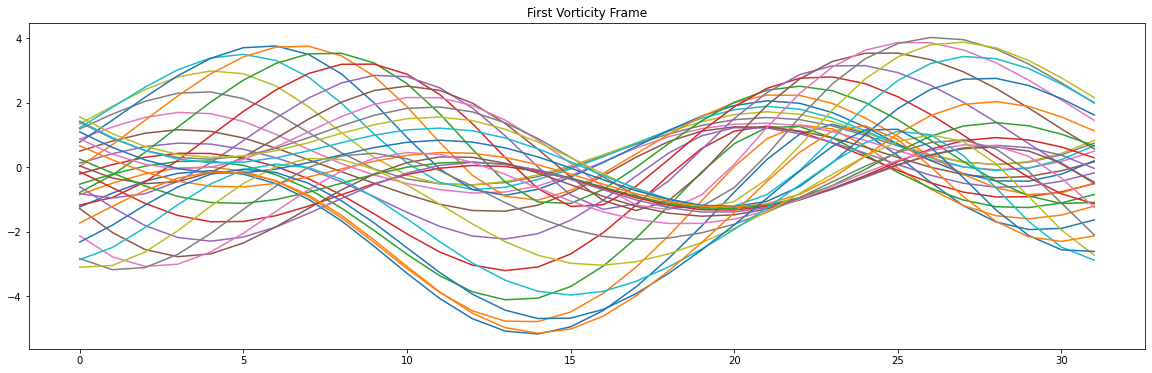

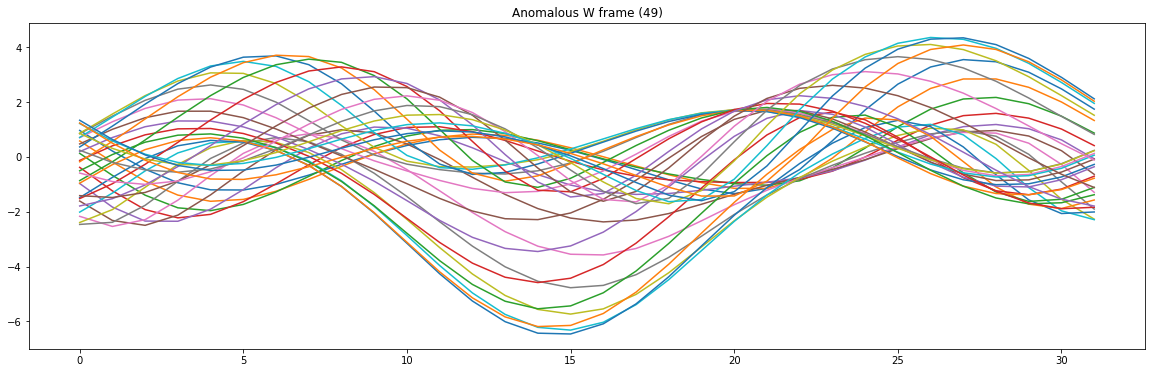

In [30]:
# Plot first w frame
plt.plot(w_raw[0])
plt.title("First Vorticity Frame")
plt.show()

#Plot 49th w frame - first anomalous case
plt.plot(w_raw[49])
plt.title("Anomalous W frame (49)")
plt.show()

# SVM Testing

In [14]:
# Reshape w and state to be one dimensional. (1 x 99k)
state=state.squeeze()
state=state[1:]
[M,N1,N2]=w_raw.shape
w=w_raw.reshape(M,-1)
w=w[1:]

test_size = 1000
train_size = 4000

In [15]:
def train_test_split(w, train_size, test_size):
    w_train = w[0:train_size,]
    w_test = w[train_size:train_size+test_size,]
    return w_train, w_test


In [16]:
def fit_predict_svm(kern, w_train, w_test):
    model = svm.OneClassSVM(kernel=kern).fit(w_train)
    pred = model.predict(w_test)
    return pred

In [17]:
# Split into training and testing sets
w_train, w_test = train_test_split(w, train_size, test_size)

# Initialize model and predict
y_pred_linear = fit_predict_svm('linear', w_train, w_test)
y_pred_poly = fit_predict_svm('poly', w_train, w_test)
y_pred_rbf = fit_predict_svm('rbf', w_train, w_test)



In [18]:
normal_linear = y_pred_linear[y_pred_linear==1]
anomalous_linear = y_pred_linear[y_pred_linear==-1]
print("Linear Kernel Predictions")
print("{} normal, {} anomalous.".format(len(normal_linear), len(anomalous_linear)))

normal_poly = y_pred_poly[y_pred_poly==1]
anomalous_poly = y_pred_poly[y_pred_poly==-1]
print("Polynomial Kernel Predictions")
print("{} normal, {} anomalous.".format(len(normal_poly), len(anomalous_poly)))

normal_rbf = y_pred_rbf[y_pred_rbf==1]
anomalous_rbf = y_pred_rbf[y_pred_rbf==-1]
print("RBF Kernel Predictions")
print("{} normal, {} anomalous.".format(len(normal_rbf), len(anomalous_rbf)))

indexes_linear = []
KE_vals_linear = []
state_linear = []

indexes_poly = []
KE_vals_poly = []
state_poly = []


indexes_rbf = []
KE_vals_rbf = []
state_rbf = []


indexes_state = []
KE_vals_state = []

for i in range(train_size, test_size+train_size):
    if y_pred_linear[i-train_size] == -1:
        indexes_linear.append(i-train_size)
        KE_vals_linear.append(Kol['KE'][0][i])
        state_linear.append(Kol['state'][0][i])
    if y_pred_poly[i-train_size] == -1:
        indexes_poly.append(i-train_size)
        KE_vals_poly.append(Kol['KE'][0][i])
        state_poly.append(Kol['state'][0][i])
    if y_pred_rbf[i-train_size] == -1:
        indexes_rbf.append(i-train_size)
        KE_vals_rbf.append(Kol['KE'][0][i])
        state_rbf.append(Kol['state'][0][i])
    if state[i] != 0:
        indexes_state.append(i-train_size)
        KE_vals_state.append(Kol['KE'][0][i])


Linear Kernel Predictions
450 normal, 550 anomalous.
Polynomial Kernel Predictions
438 normal, 562 anomalous.
RBF Kernel Predictions
504 normal, 496 anomalous.


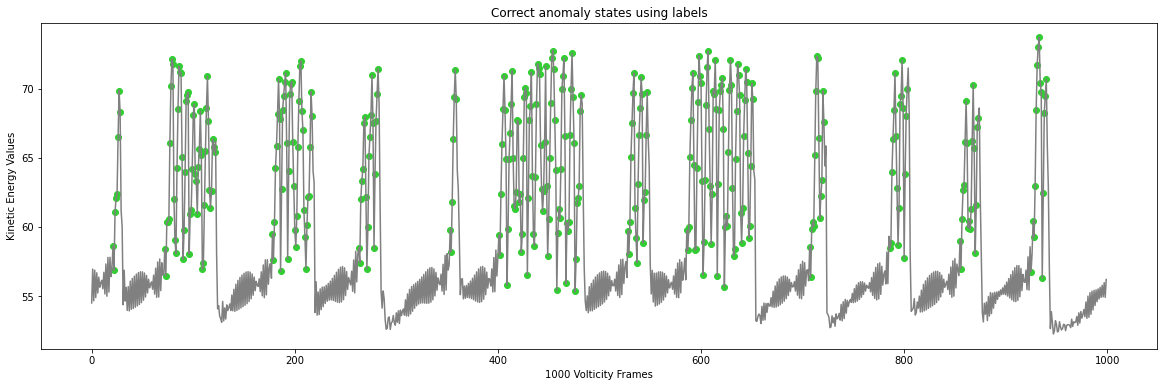

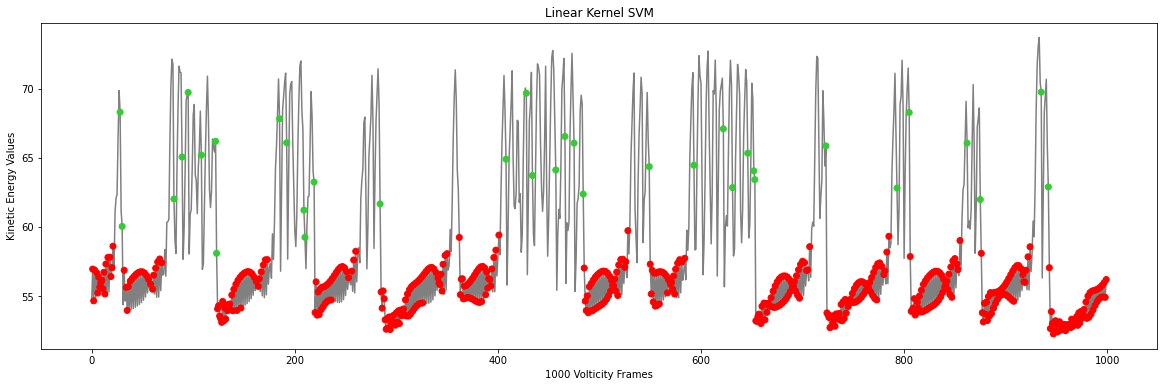

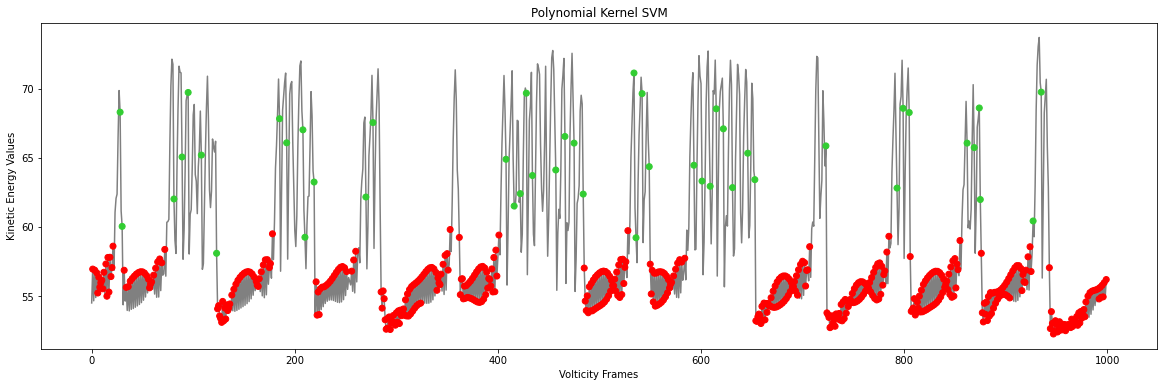

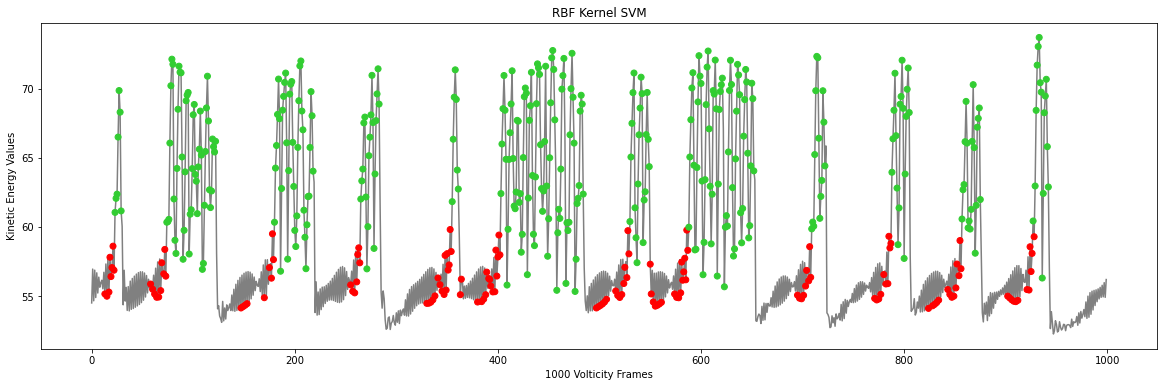

In [27]:

from matplotlib import colors

cmap = colors.ListedColormap(['Red', 'limegreen'])

classes = ["Predicted Anomalous", "Predicted Normal"]

#plt.grid()
plt.plot(KE[0][train_size:test_size+train_size], color="gray")
plt.title("Correct anomaly states using labels")
plt.scatter(indexes_state, KE_vals_state, color="limegreen")
plt.xlabel("{} Volticity Frames".format(test_size))
plt.ylabel("Kinetic Energy Values")
plt.show()

#plt.grid()
plt.plot(KE[0][train_size:test_size+train_size], color="gray", zorder = 0)
plt.title("Linear Kernel SVM")
plt.xlabel("{} Volticity Frames".format(test_size))
plt.ylabel("Kinetic Energy Values")
plt.scatter(indexes_linear, KE_vals_linear, c = state_linear, cmap=cmap, zorder = 1)
plt.show()

#plt.grid()
plt.plot(KE[0][train_size:test_size+train_size], color="gray", zorder = 0)
plt.title("Polynomial Kernel SVM")
plt.xlabel("Volticity Frames".format(test_size))
plt.ylabel("Kinetic Energy Values")
plt.scatter(indexes_poly, KE_vals_poly, c = state_poly, cmap=cmap, zorder = 1)
plt.show()

#plt.grid()
plt.scatter(indexes_rbf, KE_vals_rbf, c = state_rbf, cmap=cmap, zorder = 1)
plt.plot(KE[0][train_size:test_size+train_size], zorder = 0, color="gray")
plt.title("RBF Kernel SVM")
#plt.legend(*scatter.legend_elements())
plt.xlabel("{} Volticity Frames".format(test_size))
plt.ylabel("Kinetic Energy Values")
plt.show()



In [9]:
correct_states = state[train_size:train_size+test_size]
correct_states = [-1 if x==1 else x for x in correct_states]
correct_states = [1 if x==0 else x for x in correct_states]

In [10]:
n_correct_linear = 0
n_correct_poly = 0
n_correct_rbf = 0
for i in range(0, test_size):
    if correct_states[i] == y_pred_linear[i]:
        n_correct_linear += 1
    if correct_states[i] == y_pred_poly[i]:
        n_correct_poly += 1
    if correct_states[i] == y_pred_rbf[i]:
        n_correct_rbf += 1

print(n_correct_linear)
print(n_correct_poly)
print(n_correct_rbf)

138
148
858


In [11]:
print("Accuracy of the Linear SVM Kernel: {}%".format(n_correct_linear/test_size*100))
print("Accuracy of the Polynomial SVM Kernel: {}%".format(n_correct_poly/test_size*100))
print("Accuracy of the RBF SVM Kernel: {}%".format(n_correct_rbf/test_size*100))

Accuracy of the Linear SVM Kernel: 13.8%
Accuracy of the Polynomial SVM Kernel: 14.799999999999999%
Accuracy of the RBF SVM Kernel: 85.8%


# BULLSHIT TESTING BELOW

In [17]:
test_size = 1000
train_size = 4000

In [23]:
state=state.squeeze()
state=state[1:]
[M,N1,N2]=w_raw.shape
w=w_raw.reshape(M,-1)
w=w[1:]
w_new_train = w[0:train_size,]
w_new_test = w[train_size:train_size+test_size,]

In [41]:
print(sklearn.__version__)

0.24.2


In [21]:
m = SGDOneClassSVM()


In [24]:
m.fit(w_new_train)
m_pred = m.predict(w_new_test)


In [25]:
normal_rbf_m = m_pred[m_pred==1]
anomalous_rbf_m = m_pred[m_pred==-1]
print("RBF Kernel Predictions - Unsupervised")
print("{} normal, {} anomalous.".format(len(normal_rbf_m), len(anomalous_rbf_m)))

RBF Kernel Predictions - Unsupervised
960 normal, 40 anomalous.


In [26]:
indexes_SGD = []
KE_vals_SGD = []
for i in range(train_size, test_size+train_size):
    if m_pred[i-train_size] == -1:
        indexes_SGD.append(i-train_size)
        KE_vals_SGD.append(Kol['KE'][0][i])
    

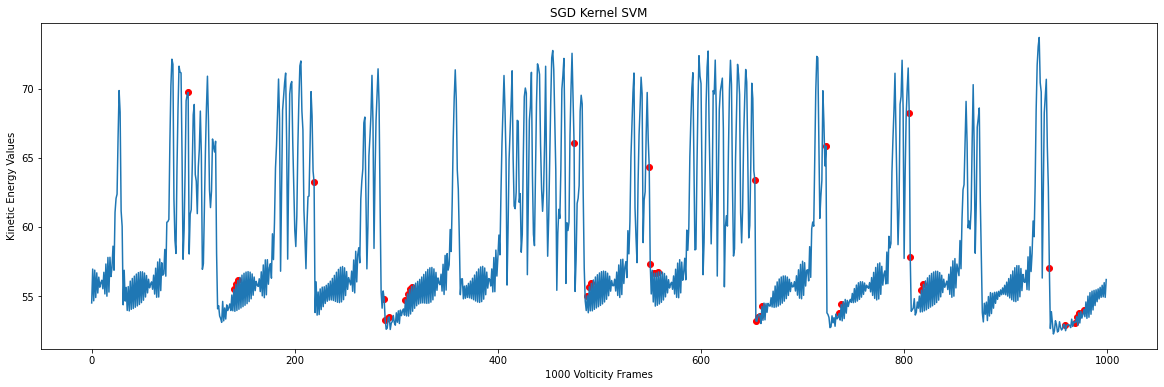

In [27]:
plt.plot(KE[0][train_size:test_size+train_size])
plt.title("SGD Kernel SVM")
plt.xlabel("{} Volticity Frames".format(test_size))
plt.ylabel("Kinetic Energy Values")
plt.scatter(indexes_SGD, KE_vals_SGD, color="Red")
plt.show()

In [ ]:
# Load in the data as a dictionary
Kol=loadmat('Kol_Label.mat')
# Separate keys of the dictionary
KE = Kol['KE']
w_raw = Kol['w']
state = Kol['state']

test_size = 85000
train_size = 10000

state=state.squeeze()
state=state[1:]
[M,N1,N2]=w_raw.shape
w=w_raw.reshape(M,-1)
w=w[1:]
w_train = w[0:train_size,] 
w_test = w[train_size:train_size+test_size,]

In [ ]:
model_rbf = svm.OneClassSVM(kernel = 'rbf').fit(w_train)
y_pred_rbf = model_rbf.predict(w_test)
normal_rbf = y_pred_rbf[y_pred_rbf==1]
anomalous_rbf = y_pred_rbf[y_pred_rbf==-1]
print("RBF Kernel Predictions")
print("{} normal, {} anomalous.".format(len(normal_rbf), len(anomalous_rbf)))

In [ ]:
indexes_rbf = []
KE_vals_rbf = []
state_rbf = []

for i in range(train_size, test_size+train_size):
    if y_pred_rbf[i-train_size] == -1:
        indexes_rbf.append(i-train_size)
        KE_vals_rbf.append(Kol['KE'][0][i])
        state_rbf.append(Kol['state'][0][i])
correct_states = state[train_size:train_size+test_size]
correct_states = [-1 if x==1 else x for x in correct_states]
correct_states = [1 if x==0 else x for x in correct_states]

n_correct_rbf = 0
for i in range(0, test_size):
    if correct_states[i] == y_pred_rbf[i]:
        n_correct_rbf += 1
print("Accuracy of the RBF SVM Kernel: {}%".format(n_correct_rbf/test_size*100))